Informalidad laboral y brecha entre las tasas netas de participacion femenina y masculina. Parte2
=========================================================================================

Objetivo
--------
Combino dos archivos, uno de formato csv y otro xls. Se limpian los datos y se elige una muestra para explorar la relación entre variables. Se contruyen tablas auxiliares para realizar un análisis de la información de la tabla en su totalidad. Hago una exploración de una muestra de datos corresponientes a varios años, esto es la continuación del Capítulo 5.

Datos
-----
 Los datos que se usan son correspondientes a las tasas de participación laboral por género y la tasa de informalidad laboral. Para mayor detalle se puede consultar la descripción desde las siguiente fuentes:
  * [Tasa Neta de Participación por Género](http://busca.datos.gob.mx/#!/conjuntos/objetivos-de-desarrollo-sostenible-brecha-entre-la-tasa-neta-de-participacion-femenina-y-la-tas/)
  * [Tasa de Informalidad](http://busca.datos.gob.mx/#!/conjuntos/objetivos-de-desarrollo-sostenible-tasa-de-informalidad-laboral-til--1/)
  
Código
------
Debido a que uso los mismos datos del capítulo 5 entonces parte del código es el mismo al que se tiene en ese capítulo.

In [1]:
#El código necesario del Capitulo 5

#Se cargan las librerías requeridas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from __future__ import division
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(20,10)

#Se carga el primer archivo, la informacion es la población en trabajos informales por estado y año
Informalidad=pd.read_excel('/home/dlegorreta/Documentos/Tutorial-Python/Datos/Base_Tasa_de_informalidad.xlsx')

#Se cargan los datos sobre la brecha laboral
Brecha=pd.read_csv('/home/dlegorreta/Documentos/Tutorial-Python/Datos/Base_Brecha_entre_la_TNP_femenina_y_TNP_masculina.csv')

#Cambio el nombre a las columnas o variables de los DataFrame
Brecha.columns=['Periodo','Entidad','Grupo_Edad','PEA_M','PET_M','TNP_M','PEA_H','PET_H','TNP_H']
Informalidad.columns=['Periodo','Entidad','Sexo','Grupo_Edad','TAgroInf','TSecInf','TInfSecFor','TDomesInf','Pob_Ocup_T']

#Cambio el tipo de datos a numérico
Brecha['PEA_M']=pd.to_numeric(Brecha['PEA_M'],errors='coercion')
Brecha['PET_M']=pd.to_numeric(Brecha['PET_M'],errors='coercion')
Brecha['TNP_M']=pd.to_numeric(Brecha['TNP_M'],errors='coercion')
Brecha['PEA_H']=pd.to_numeric(Brecha['PEA_H'],errors='coercion')
Brecha['PET_H']=pd.to_numeric(Brecha['PET_H'],errors='coercion')
Brecha['TNP_H']=pd.to_numeric(Brecha['TNP_H'],errors='coercion')

#Se define otra DataFrame sin datos NaN
Brecha=Brecha.dropna()

Se elige la muestra de datos correspondiente al periodo del 2000 al 2014 para los dos DataFrame.

In [2]:
Brecha_M=Brecha.loc[(Brecha['Periodo']>=2000) & (Brecha['Periodo']<=2014)]

In [3]:
Informalidad_M=Informalidad.loc[Informalidad['Periodo']>=2000]

Reviso que los DataFrame tenga el mismo rango de años, para eso reviso los primeros y los últimos registros.

In [4]:
Brecha_M.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
330,2000,Nacional,De 15 a 29 a�os,5550681.0,14121386.0,39.306914,9749694.0,12984648.0,75.086317
331,2000,Nacional,De 30 a�os y m�s,7771563.0,20168181.0,38.533783,15511584.0,17906720.0,86.624373
332,2000,Aguascalientes,De 15 a 29 a�os,59242.0,135479.0,43.727810,90375.0,119380.0,75.703635
333,2000,Aguascalientes,De 30 a�os y m�s,65874.0,192588.0,34.204623,139224.0,162289.0,85.787700
334,2000,Baja California,De 15 a 29 a�os,165916.0,346815.0,47.839915,263906.0,343880.0,76.743631


In [5]:
Brecha_M.tail()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
1315,2014,Veracruz,De 30 a�os y m�s,781399.0,2137805.0,36.551479,1476875.0,1784262.0,82.772326
1316,2014,Yucat�n,De 15 a 29 a�os,121340.0,271803.0,44.642617,193512.0,272592.0,70.989584
1317,2014,Yucat�n,De 30 a�os y m�s,261556.0,525409.0,49.781456,406681.0,473236.0,85.936094
1318,2014,Zacatecas,De 15 a 29 a�os,66925.0,201032.0,33.290554,128865.0,181529.0,70.988715
1319,2014,Zacatecas,De 30 a�os y m�s,145382.0,376792.0,38.584045,274217.0,338272.0,81.064069


Se observa que en el DataFrame de **Brecha** se tienen en la columna **Entidad** que aparece como nombre *Nacional*, esto es debido a que se tiene en esa fila o registro la información correspondiente para cada año de las estadisticas Nacionales. Elimino las filas que tienen como **Entidad** el nombre *Nacional*. 

In [6]:
#Quitamos todos los registros correspondientes a los valores "Nacionales", en la variable Entidad.
Brecha_M=Brecha_M.loc[Brecha['Entidad']!= 'Nacional']

In [7]:
Brecha_M.head()

,Periodo,Entidad,Grupo_Edad,PEA_M,PET_M,TNP_M,PEA_H,PET_H,TNP_H
332,2000,Aguascalientes,De 15 a 29 a�os,59242.0,135479.0,43.727810,90375.0,119380.0,75.703635
333,2000,Aguascalientes,De 30 a�os y m�s,65874.0,192588.0,34.204623,139224.0,162289.0,85.787700
334,2000,Baja California,De 15 a 29 a�os,165916.0,346815.0,47.839915,263906.0,343880.0,76.743631
335,2000,Baja California,De 30 a�os y m�s,196919.0,465208.0,42.329238,386584.0,452026.0,85.522514
336,2000,Baja California Sur,De 15 a 29 a�os,25269.0,57755.0,43.752056,43775.0,59883.0,73.100880


In [8]:
Informalidad_M.head()

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T
268,2000,Aguascalientes,Hombres,De 15 a 29 años,7612,19911,8890,102,86656
269,2000,Aguascalientes,Hombres,De 30 y mas años,18349,34118,7382,189,136748
270,2000,Aguascalientes,Mujeres,De 15 a 29 años,1061,6322,8010,2165,56956
271,2000,Aguascalientes,Mujeres,De 30 y mas años,2076,12549,7925,3791,64668
272,2000,Baja California,Hombres,De 15 a 29 años,12475,49574,43143,335,257079


In [9]:
Informalidad_M.tail()

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T
2183,2014,Yucatan,Mujeres,De 30 y mas años,3876,97427,30679,35355,256387
2184,2014,Zacatecas,Hombres,De 15 a 29 años,35592,26831,22649,212,119210
2185,2014,Zacatecas,Hombres,De 30 y mas años,91137,55968,21206,720,264894
2186,2014,Zacatecas,Mujeres,De 15 a 29 años,4272,13798,18999,5513,60859
2187,2014,Zacatecas,Mujeres,De 30 y mas años,11187,44379,18876,12264,141249


Reviso como se comportan las **Tasas Netas de Participación** y la **Población Ocupada Total** con respecto a los años.

In [10]:
#Cargo esta librería para cambiar el encoding
import sys
reload(sys)
sys.setdefaultencoding('utf8')

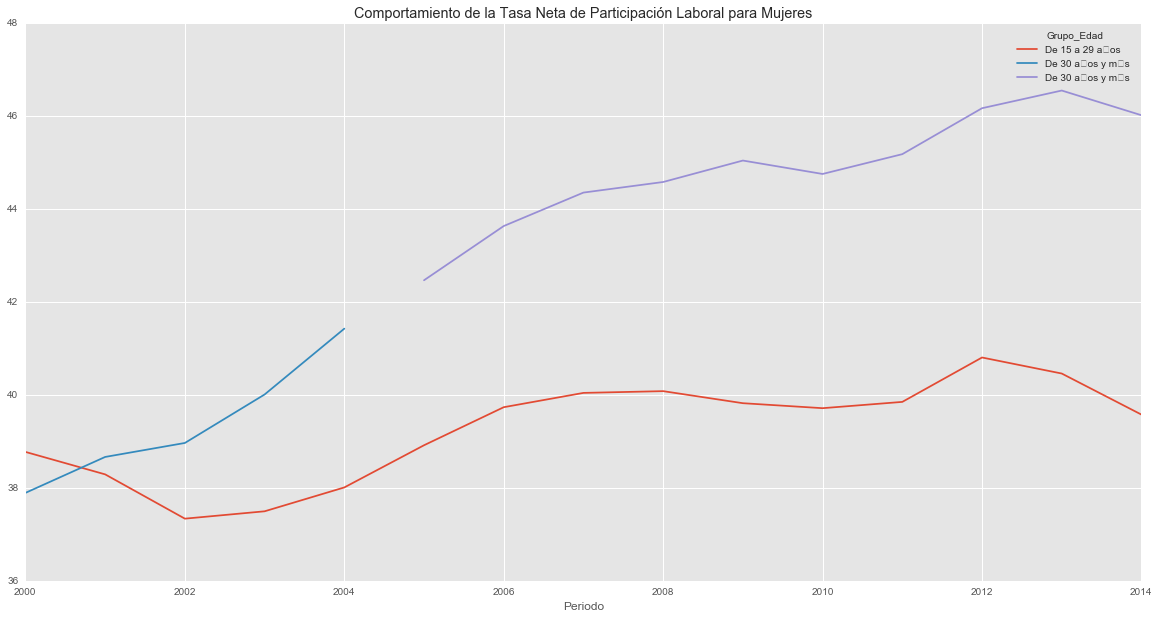

In [11]:
Brecha_M.pivot_table(values='TNP_M', index=['Periodo'], columns=['Grupo_Edad']).plot(title='Comportamiento de la Tasa Neta de Participación Laboral para Mujeres')

Lo primero que se observa en la gráfica es una separación o corte, supongo se debe a que la columna **Grupo_Edad** tiene algún caracter o espacio de más en la cadena, por tal razón posiblemente matplot lo interpreta como si fuera una categoría diferente. Los datos de la tabla pivot son los siguientes:

In [12]:
Brecha_M.pivot_table(values='TNP_M', index=['Periodo'], columns=['Grupo_Edad'])

Grupo_Edad,De 15 a 29 a�os,De 30 a�os y m�s,De 30 a�os y m�s
Periodo,,,
2000,38.771817,37.890830,NaN
2001,38.288633,38.663558,NaN
2002,37.336408,38.964258,NaN
2003,37.494527,40.006698,NaN
2004,38.007891,41.422455,NaN
2005,38.915035,NaN,42.463303
2006,39.733333,NaN,43.629209
2007,40.040981,NaN,44.348830
2008,40.078657,NaN,44.576394


*Desconozco el porqué lo reconoce como una cadena o categoría diferente. Pero tendría que revisar los datos desde el archivo csv.*

Ahora lo que hago es contruir otra tabla pivot en la cual se visualize la tasa neta de participación de los Hombres.

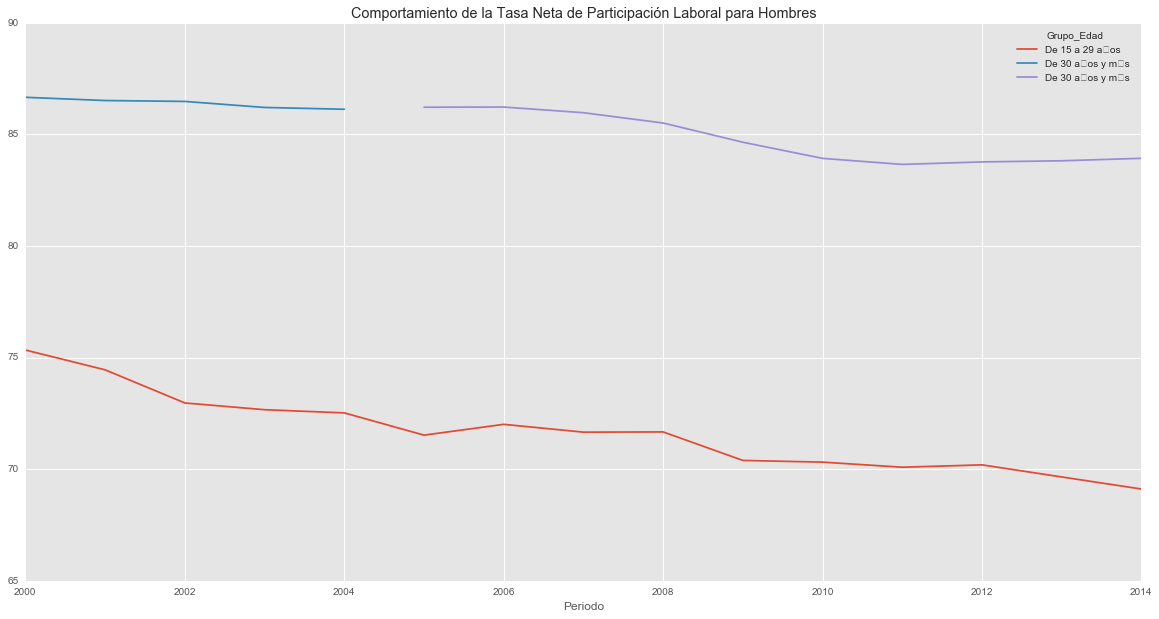

In [13]:
Brecha_M.pivot_table(values='TNP_H', index=['Periodo'], columns=['Grupo_Edad']).plot(title='Comportamiento de la Tasa Neta de Participación Laboral para Hombres')

Comparando las dos gráficas se muestan comportamientos distintos, mientras la **Tasa para Mujeres** ha incrementado conforme pasan los años para los dos rangos de edad, en el caso de la **Tasa de los Hombres** de entre 15 a 29 años tienen una *"tendencia"* a la baja y para los hombres con más de 30 años decreció en el 2008 pero posteriormente se mantuvo casi constante. Sin hacer alguna preba a detalle, parece que los niveles de participación laboral de las mujeres continuará creciendo, siendo hasta ahora el año 2013 (en los datos) el de mayor participación registrada.

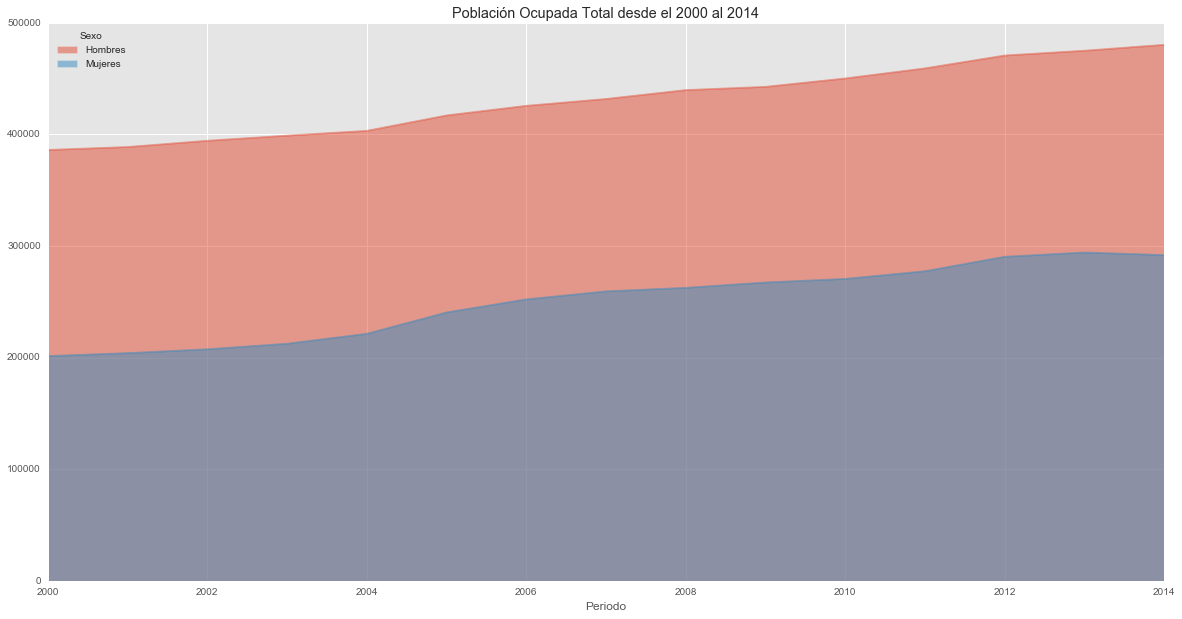

In [14]:
Informalidad_M.pivot_table(values='Pob_Ocup_T',index='Periodo',columns='Sexo').plot(kind='area',stacked=False, title='Población Ocupada Total desde el 2000 al 2014')


En la gráfica de áreas se muestra que la población que está ocupada crece ligeramente cada año, supongo que un poco a corde al crecimiento poblacional. Pero además parace que la diferencia entre la población que se encuentra ocupada laboralmente entre hombres y mujeres es constante en todo el periodo revisado, tienen algunas ligeras variaciones en la gráfica que quizás podrian ser exploradas con mayor detalle.

Como ejemplo se puede calcular la diferencia entre los valores de la Población Ocupada por género, para ver como se comporta la diferencia con respecto a los años.

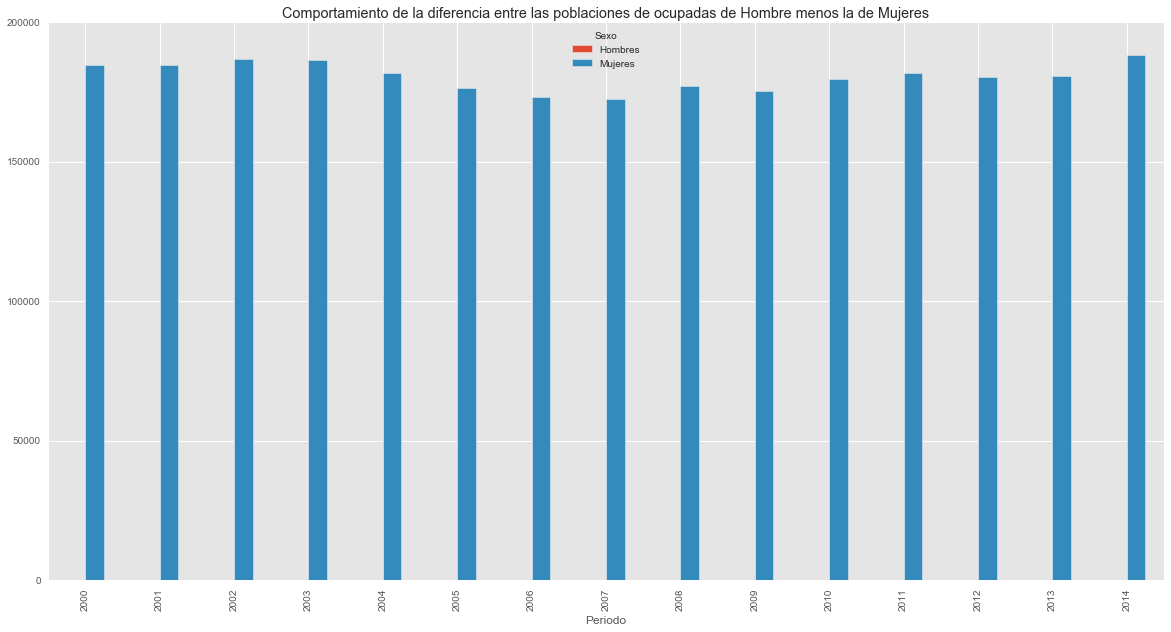

In [15]:
Informalidad_M.pivot_table(values='Pob_Ocup_T',index='Periodo',columns='Sexo').diff(periods=1,axis=1).multiply(-1,axis=1).plot(kind='bar',title='Comportamiento de la diferencia entre las poblaciones de ocupadas de Hombre menos la de Mujeres')

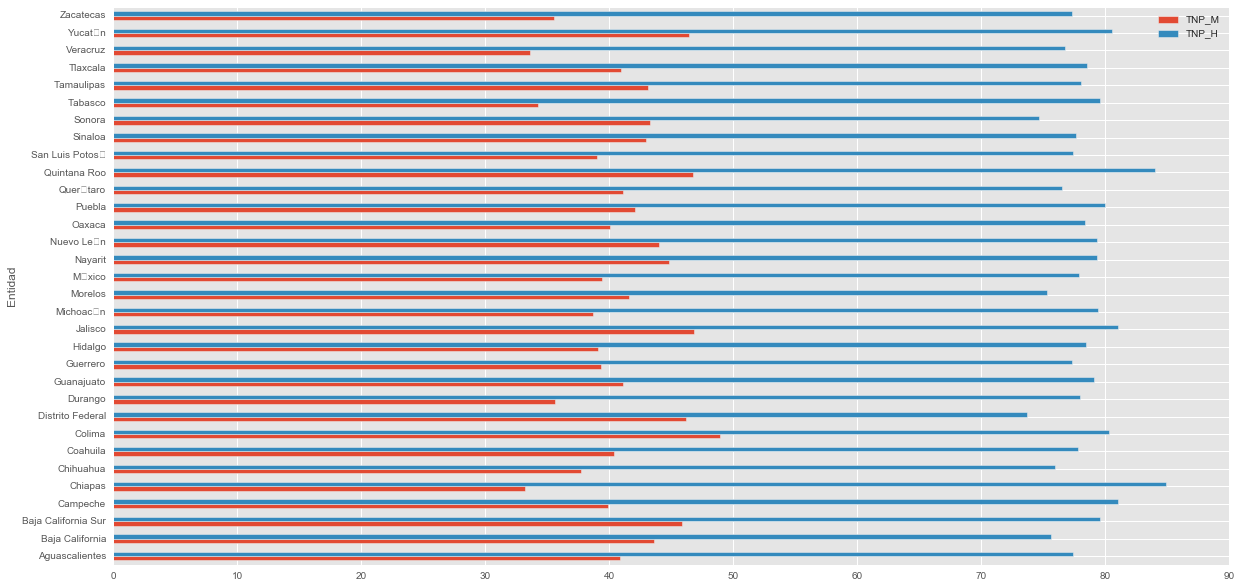

In [16]:
Brecha_M[['Entidad','TNP_M','TNP_H']].groupby('Entidad').mean().plot(kind='barh')

En la gráfica de barras se aprecia que hay Entidades donde la tasa neta de participación es alta tanto para hombres como para mujeres, pero otros casos como Tabasco y Chiapas muestan que la tasa para los hombres es alta y la de las mujeres es baja con respecto al resto. Otros ejemplos, como Jalisco muestran una alta tasa tanto para hombres como para mujeres.

Del DataFrame de Informalidad, se puede revisar como cambiaron los tipos de informalidad registrados al paso de los años.

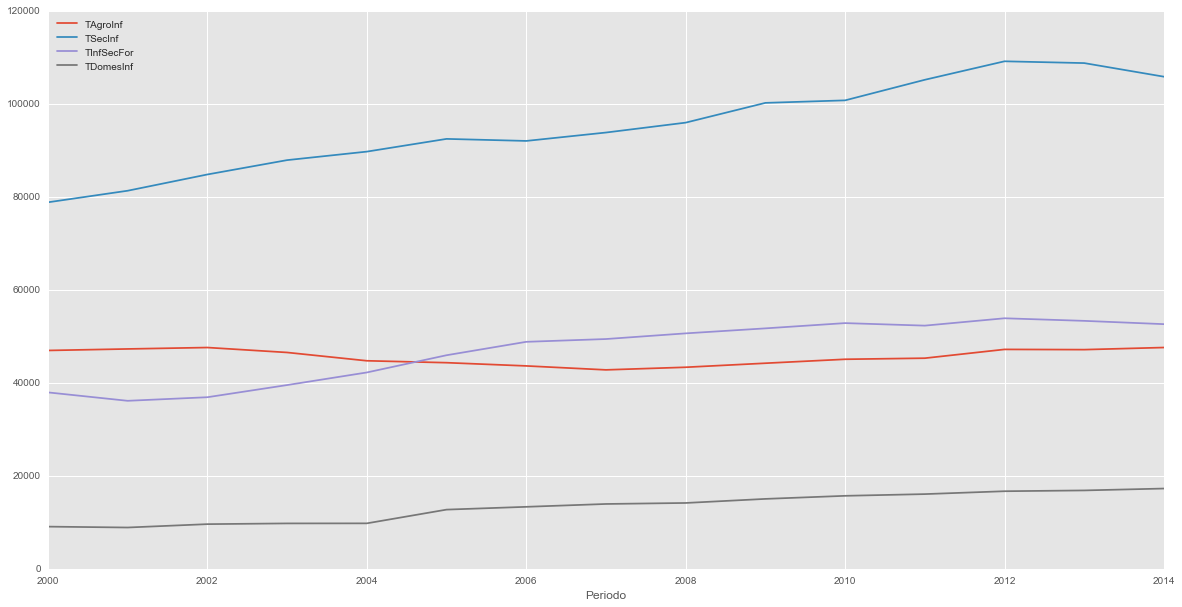

In [17]:
Informalidad_M[['Periodo','TAgroInf','TSecInf','TInfSecFor','TDomesInf']].groupby('Periodo').mean().plot()

Se observa que entre el 2004 y 2005 se presenta un cambio o cruce entre la población en informalidad Agropecuaria y la población en trabajos informales de sectores formales. También se observa que la cantidad de personas que trabajan en el sector informal siempre está en incremento. 

Igual a lo que hice en el análisis del año 1998, también al DataFrame de Informalidad le agrego una nueva columna con un porcentaje de la población Informal.

In [18]:
Valores=np.sum(Informalidad_M.loc[:,('TAgroInf','TSecInf','TInfSecFor','TDomesInf')],axis=1)
Valores=Valores/Informalidad_M.loc[:,('Pob_Ocup_T')]   
Informalidad_M.loc[:,'Porcentaje']=Valores
del(Valores)

In [19]:
Informalidad_M.head()

,Periodo,Entidad,Sexo,Grupo_Edad,TAgroInf,TSecInf,TInfSecFor,TDomesInf,Pob_Ocup_T,Porcentaje
268,2000,Aguascalientes,Hombres,De 15 a 29 años,7612,19911,8890,102,86656,0.421379
269,2000,Aguascalientes,Hombres,De 30 y mas años,18349,34118,7382,189,136748,0.439041
270,2000,Aguascalientes,Mujeres,De 15 a 29 años,1061,6322,8010,2165,56956,0.308273
271,2000,Aguascalientes,Mujeres,De 30 y mas años,2076,12549,7925,3791,64668,0.407327
272,2000,Baja California,Hombres,De 15 a 29 años,12475,49574,43143,335,257079,0.410485


Se puede así con el DataFrame de Informalidad revisar como se comportó el porcentaje de informalidad por entidad, por año y género, o combinando ha estas.

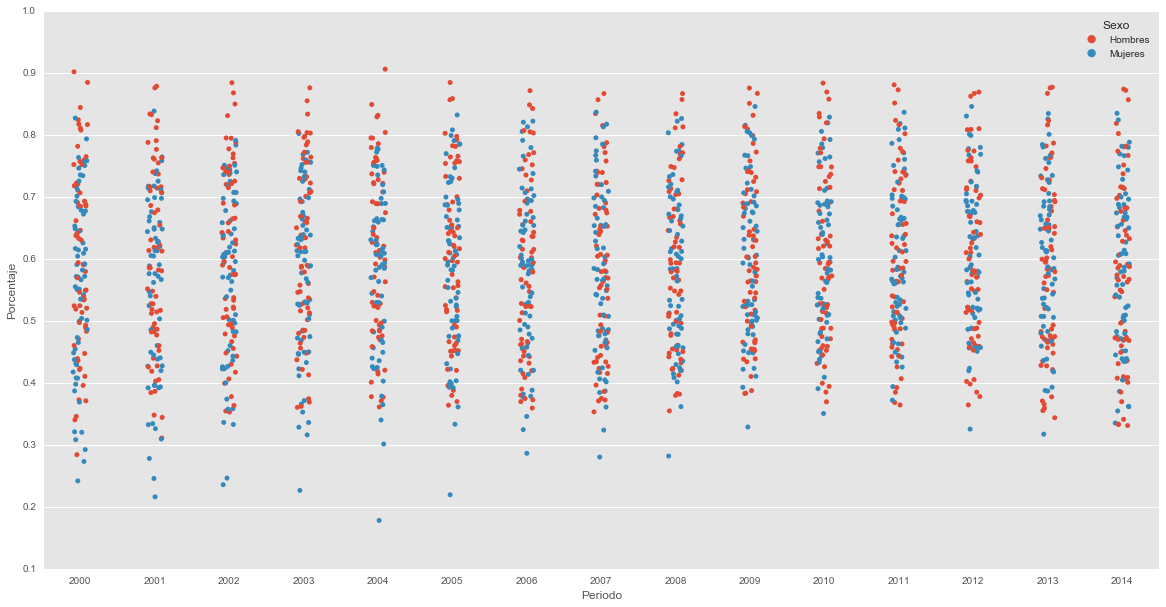

In [20]:
#Se explora el comportamiento del porcentaje en los años.
sns.stripplot(x="Periodo",y="Porcentaje",hue="Sexo",data=Informalidad_M,jitter=True)

En las gáficas se muestra como se mezclan los valores separados por género y a su vez se obseva el comportamiento entre esas dos clases en cada año.

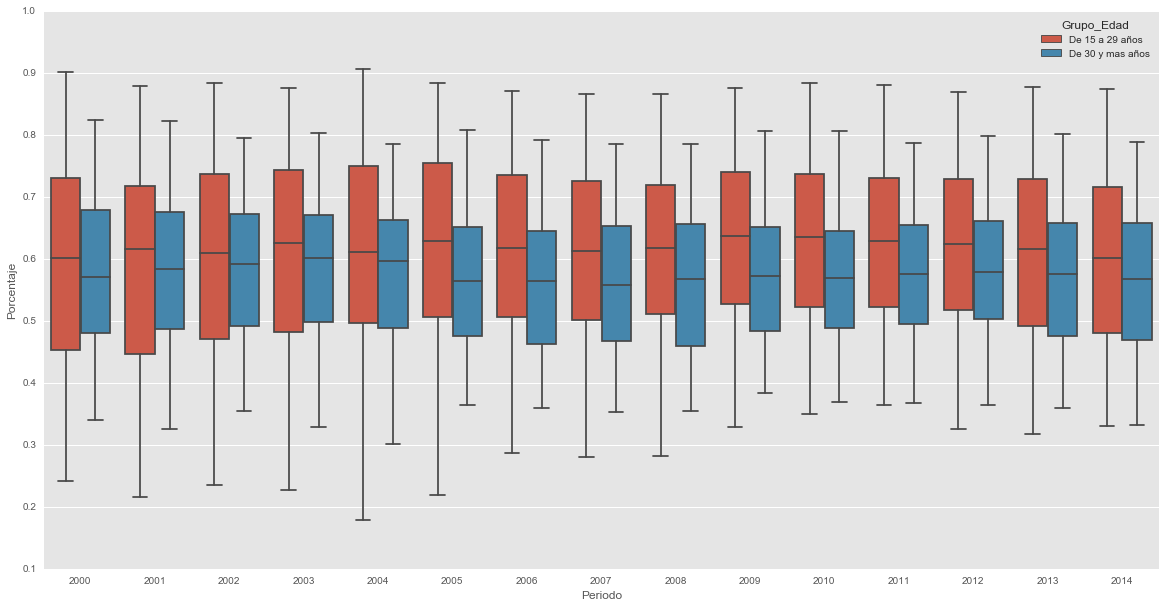

In [21]:
sns.boxplot(x="Periodo",y="Porcentaje",hue="Grupo_Edad",data=Informalidad_M)

Otra exploración que se puede hacer es conocer como se comporta la informalidad separada por género.

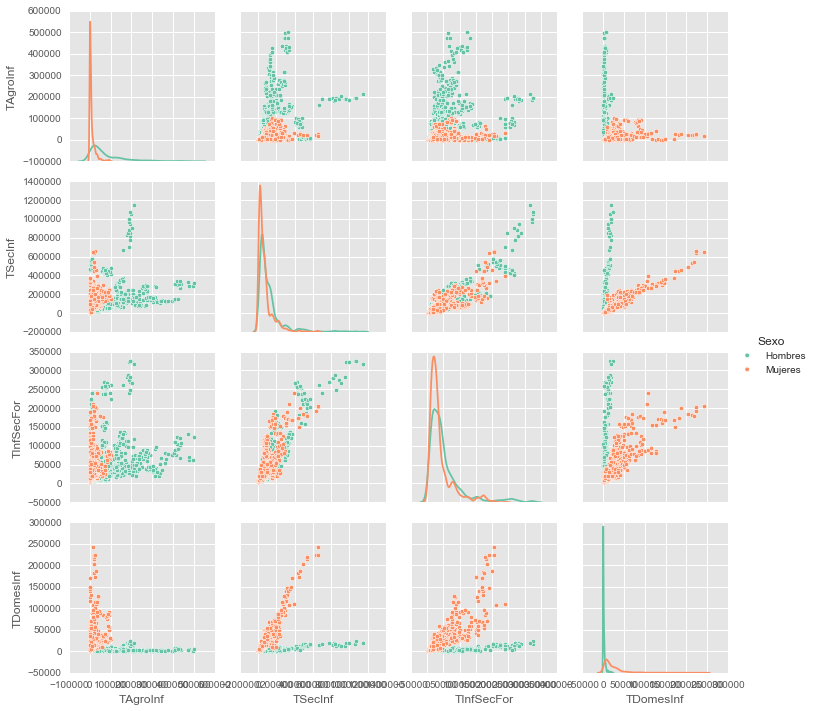

In [22]:
sns.pairplot( hue="Sexo",diag_kind="kde",palette="Set2",data=Informalidad_M[['Sexo','TAgroInf','TSecInf','TInfSecFor','TDomesInf']])

Lo que se muestra en el panel de gráficas es como se comportan las dos categorías, se muestra a su vez el comportamiento entre informalidades, algunos son interesantes ver como se agrupan. No me adentro en la exploración, pero puede ocurrir que existe algun tipo de relación entre  los tipos de trabajos informales.

Ahora lo que hago es construir unos DataFrame para conformar una tabla o DataFrame  que concentre algunas variables de los conjuntos de datos. Solo tomo las tasas netas de los dos géneros y el porcentaje de informalidad, el siguiente código es para procesar y organizar los datos.

In [23]:
#Se contruye un DataFrame partiendo de las columnas de la tabla Brecha
L=Brecha_M[[ 'Periodo', 'Entidad','Grupo_Edad','TNP_M','TNP_H']]

In [24]:
#Se contruye una tabla pivot para separar los datos del porcentaje por género
L1=Informalidad_M.pivot_table(values='Porcentaje',index=['Periodo','Entidad','Grupo_Edad'],columns=['Sexo'])

In [25]:
L1.shape

(960, 2)

In [26]:
#Agrego de la tabla L3 los valores del porcentaje en el DataFrame L2
L['Hombres_Informalidad']=L1['Hombres'].values
L['Mujeres_Informalidad']=L1['Mujeres'].values
#Se contruyen el nuevo DataFrame
L3=pd.concat([L,pd.get_dummies(L.Grupo_Edad)],axis=1)
L3.columns=['Periodo', 'Entidad','Grupo_Edad','TNP_M','TNP_H','Mujeres_Informalidad','Hombres_Informalidad','De_15_a_29','De_30_y_más','De_30_y']
L3.head()


,Periodo,Entidad,Grupo_Edad,TNP_M,TNP_H,Mujeres_Informalidad,Hombres_Informalidad,De_15_a_29,De_30_y_más,De_30_y
332,2000,Aguascalientes,De 15 a 29 a�os,43.727810,75.703635,0.421379,0.308273,1.0,0.0,0.0
333,2000,Aguascalientes,De 30 a�os y m�s,34.204623,85.787700,0.439041,0.407327,0.0,1.0,0.0
334,2000,Baja California,De 15 a 29 a�os,47.839915,76.743631,0.410485,0.292231,1.0,0.0,0.0
335,2000,Baja California,De 30 a�os y m�s,42.329238,85.522514,0.470750,0.407919,0.0,1.0,0.0
336,2000,Baja California Sur,De 15 a 29 a�os,43.752056,73.100880,0.489106,0.429166,1.0,0.0,0.0


Ahora que se tienen los datos "ordenados", hago una visualización de como se comportan las 4 variables y separo por género y se muestra como se muestran "los grupos" separados por género.

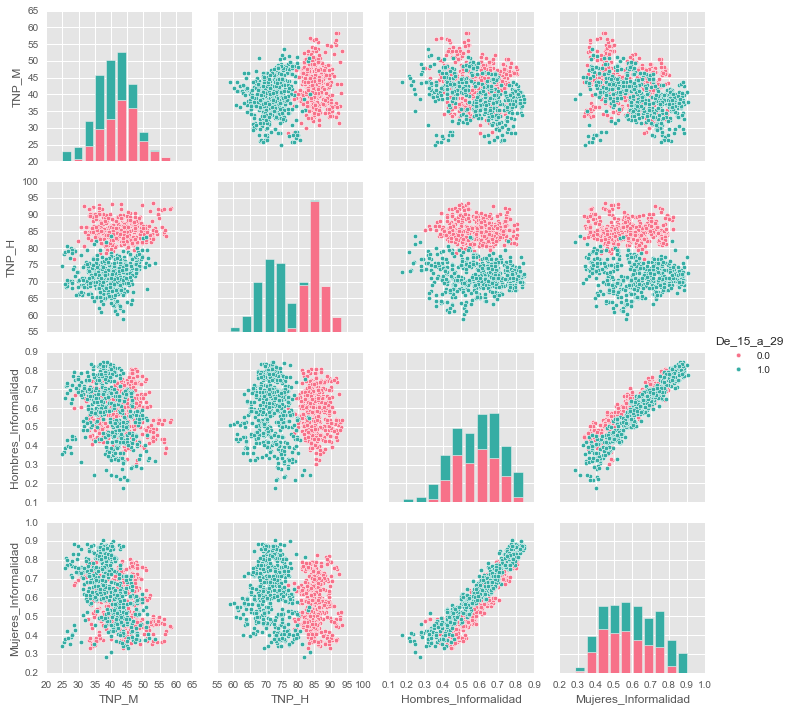

In [27]:
sns.pairplot(hue="De_15_a_29",palette="husl",vars=['TNP_M','TNP_H','Hombres_Informalidad','Mujeres_Informalidad'],data=L3[['De_15_a_29','TNP_M','TNP_H','Hombres_Informalidad','Mujeres_Informalidad']])

Como último ejemplo lo que puedo hacer es tratar de ver como se comportan las variables con respecto a los años y de igual forma a como se muestra en la gráfica anterior, se muestran ciertas agrupaciones, para confirmar si realmente existe alguna relación en porqué se define ciertos grupos se haría otro tipo de análisis.

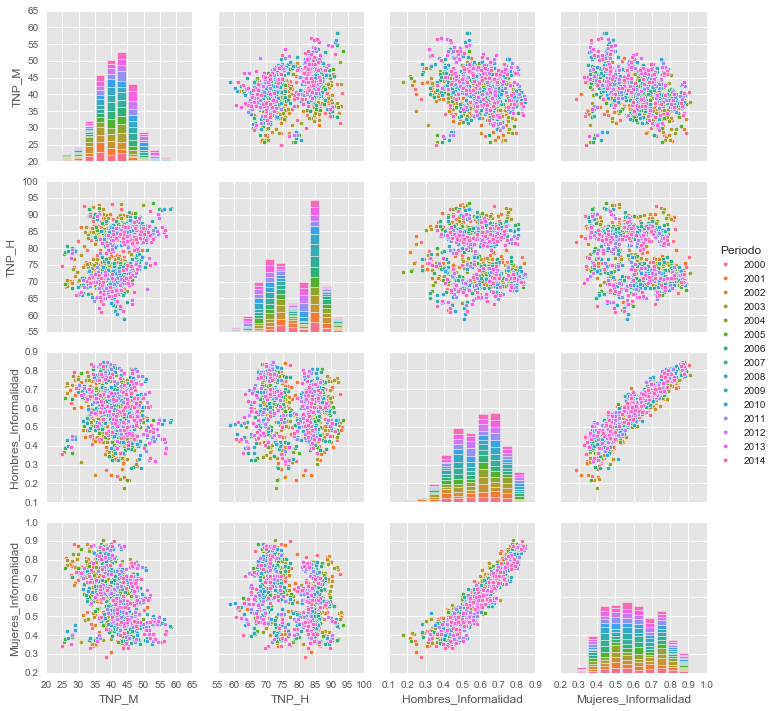

In [28]:
sns.pairplot(hue="Periodo",palette="husl",vars=['TNP_M','TNP_H','Hombres_Informalidad','Mujeres_Informalidad'],data=L3[['Periodo','TNP_M','TNP_H','Hombres_Informalidad','Mujeres_Informalidad']])

**Comentario:** la exploración solo tienen la intención de mostrar algunas operaciones que se pueden hacer con los DataFrame, también mostrar como contruir o agregar nuevas columnas con datos o cálculos y hacer algunas gráficas con a finalidad de mostrar el comportamiento de las variables con respecto las categorías y las variables entre ellas.